In [355]:
import numpy as np
import torch
import random
from collections import defaultdict

In [8]:
entr = np.load('ppi_gat_entropy.npy', allow_pickle=True)

In [35]:
entr[0][1].__len__()

2000

In [39]:
np.array(entr[0][1])

array([[4.33059406, 4.37351561, 4.31836033, 4.37006378],
       [5.18215895, 5.20220757, 5.16178703, 5.19765186],
       [4.6868639 , 4.7263031 , 4.69079208, 4.69215012],
       ...,
       [3.68769979, 3.85406017, 3.84761405, 3.8795495 ],
       [2.07091808, 2.28836656, 2.3743856 , 2.3519938 ],
       [1.26053429, 2.97180653, 3.42184162, 3.61776471]])

In [227]:
func = lambda x: round(x, 4)

In [124]:
from torch.distributions import Categorical
entropy = lambda x: Categorical(probs=x).entropy()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [69]:
conv_layer=0
epoch=30
ana = np.array(entr[conv_layer][epoch])

In [109]:
ana[:,0].mean()

0.9302445389225386

In [313]:
def plot_extropy_dist(axis,conv_layer, epoch, att_head=1, fontsize=12):
    ana = np.array(entr[conv_layer][epoch])
#     axis.scatter(range(ana.shape[0]), ana[:,att_head])
    sns.kdeplot(ana[:,att_head], ax=axis)
    axis.set_title(f'epoch: {epoch}, mean_entropy:{ana[:,att_head].mean():.2f}')

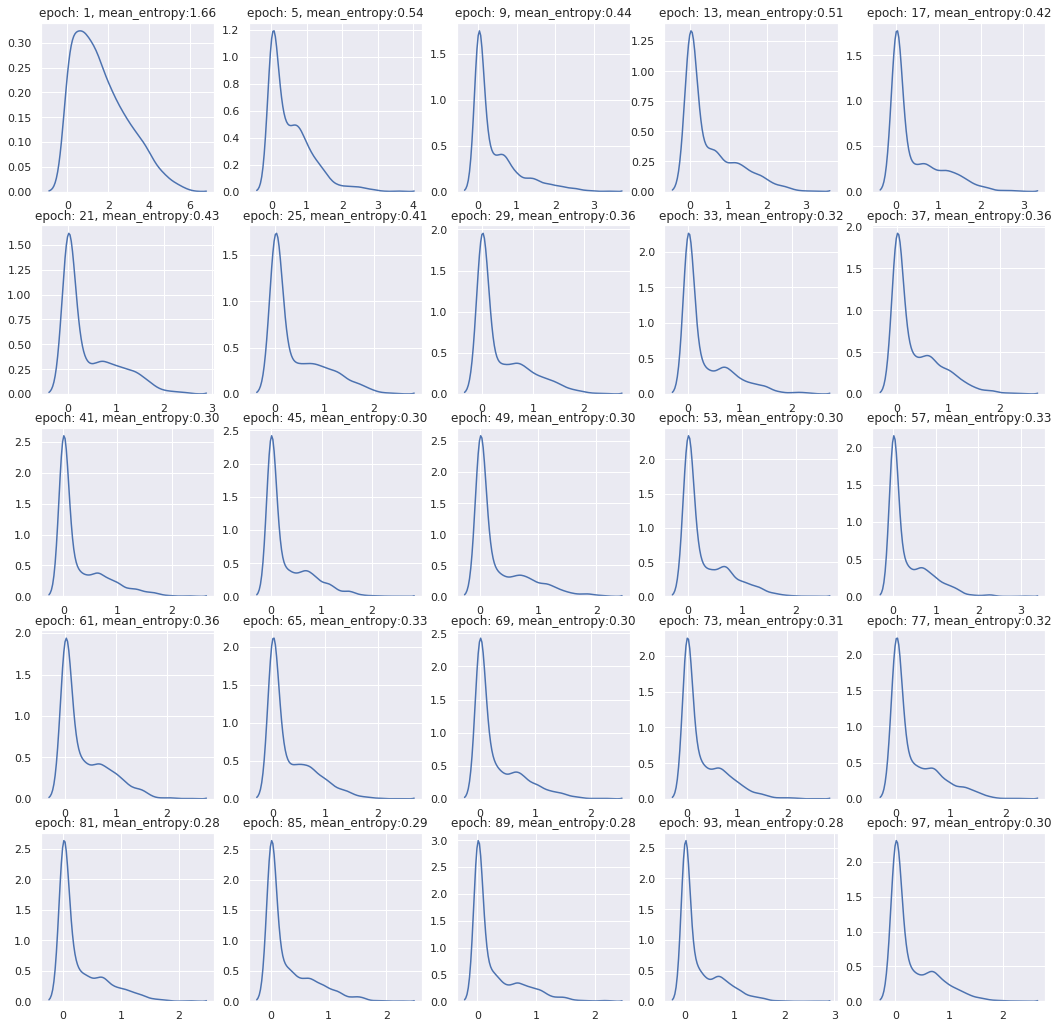

In [316]:
plt.rcParams['savefig.facecolor'] = "0.8"
plt.rcParams['figure.figsize'] = 18, 18.
fig, axs = plt.subplots(5, 5, constrained_layout=False)
# for ax in axs.flat:
axs = axs.flat
for _epoch in range(len(axs)):
#     plot_extropy_dist(axs[0,0], 0, 1)
    plot_extropy_dist(axs[_epoch], 2, _epoch*4+1, att_head=3)

In [94]:
axs[0,0]

In [247]:
top_probs = np.load('ppi_gat_sumtop2.npy', allow_pickle=True)

In [309]:
import seaborn as sns; sns.set(color_codes=True)
def plot_top_sum(axis,conv_layer, epoch, att_head=1, fontsize=12):
#     ana = np.array(entr[conv_layer][epoch])
    top_sum = np.sum(np.array(top_probs[conv_layer][epoch]), 1)
    axis.set_title(f'epoch: {epoch}, mean_sum:{top_sum[:,att_head].mean():.2f}')
    sns.kdeplot(top_sum[:,att_head], ax=axis)

In [265]:
np.array(top_probs[0][100])

array([[[0.5806, 0.906 , 0.5179, 0.8012],
        [0.4094, 0.0211, 0.2534, 0.144 ]],

       [[0.6003, 0.2845, 0.8373, 0.667 ],
        [0.3188, 0.1227, 0.0519, 0.2826]],

       [[0.8459, 0.9182, 0.2559, 0.906 ],
        [0.1119, 0.0655, 0.1588, 0.0336]],

       ...,

       [[0.9909, 0.616 , 0.363 , 0.3726],
        [0.0024, 0.1121, 0.3584, 0.3588]],

       [[0.9185, 0.1676, 0.9135, 0.6547],
        [0.0479, 0.1428, 0.0553, 0.2836]],

       [[0.3994, 0.3478, 0.3381, 0.4674],
        [0.205 , 0.2684, 0.1759, 0.2547]]])

In [267]:
# np.sum(np.array(top_probs[1]), 1)[:, 0]

In [269]:
# torch.Tensor(top_probs[0][10])

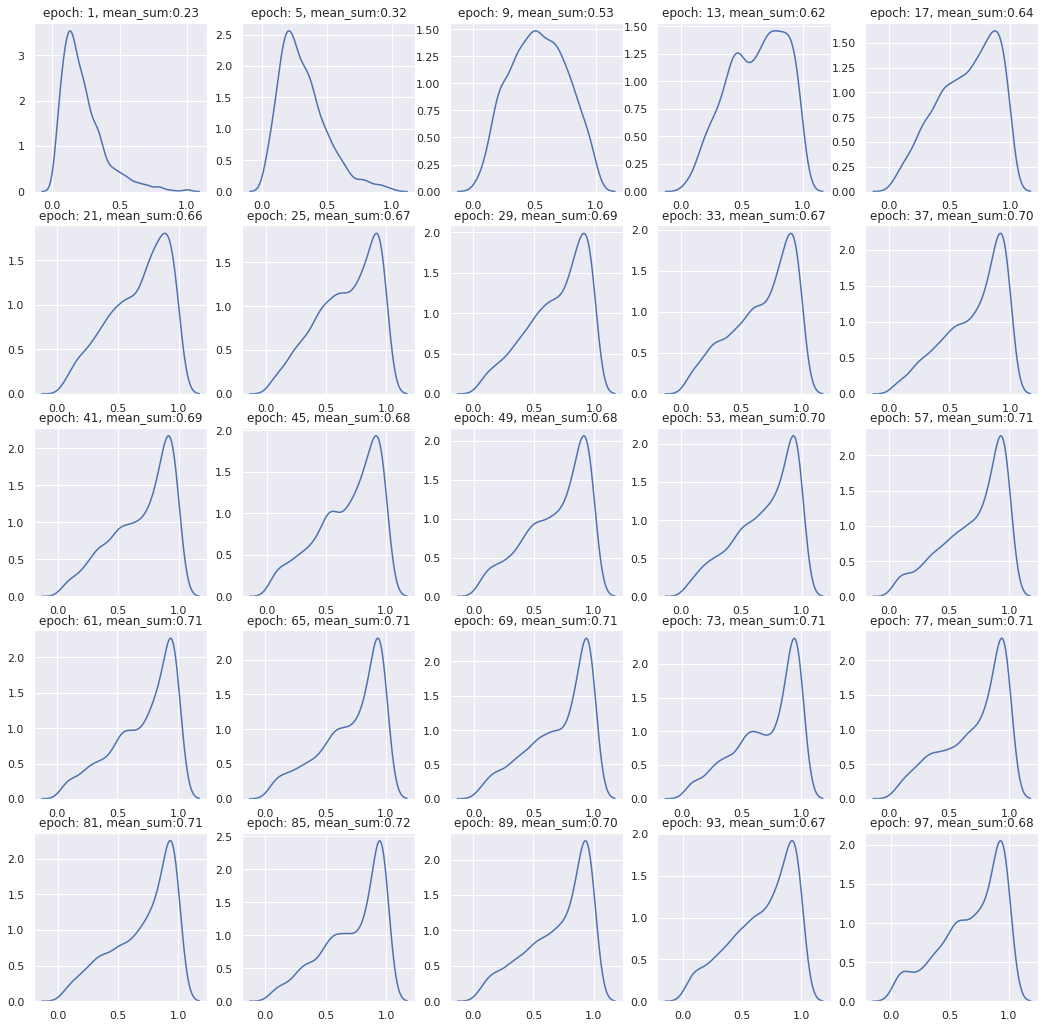

In [310]:
plt.rcParams['savefig.facecolor'] = "0.8"
plt.rcParams['figure.figsize'] = 18, 18.
fig, axs = plt.subplots(5, 5, constrained_layout=False)
# for ax in axs.flat:
axs = axs.flat
for _epoch in range(len(axs)):
#     plot_extropy_dist(axs[0,0], 0, 1)
    plot_top_sum(axs[_epoch], 0, _epoch*4+1, att_head=3)

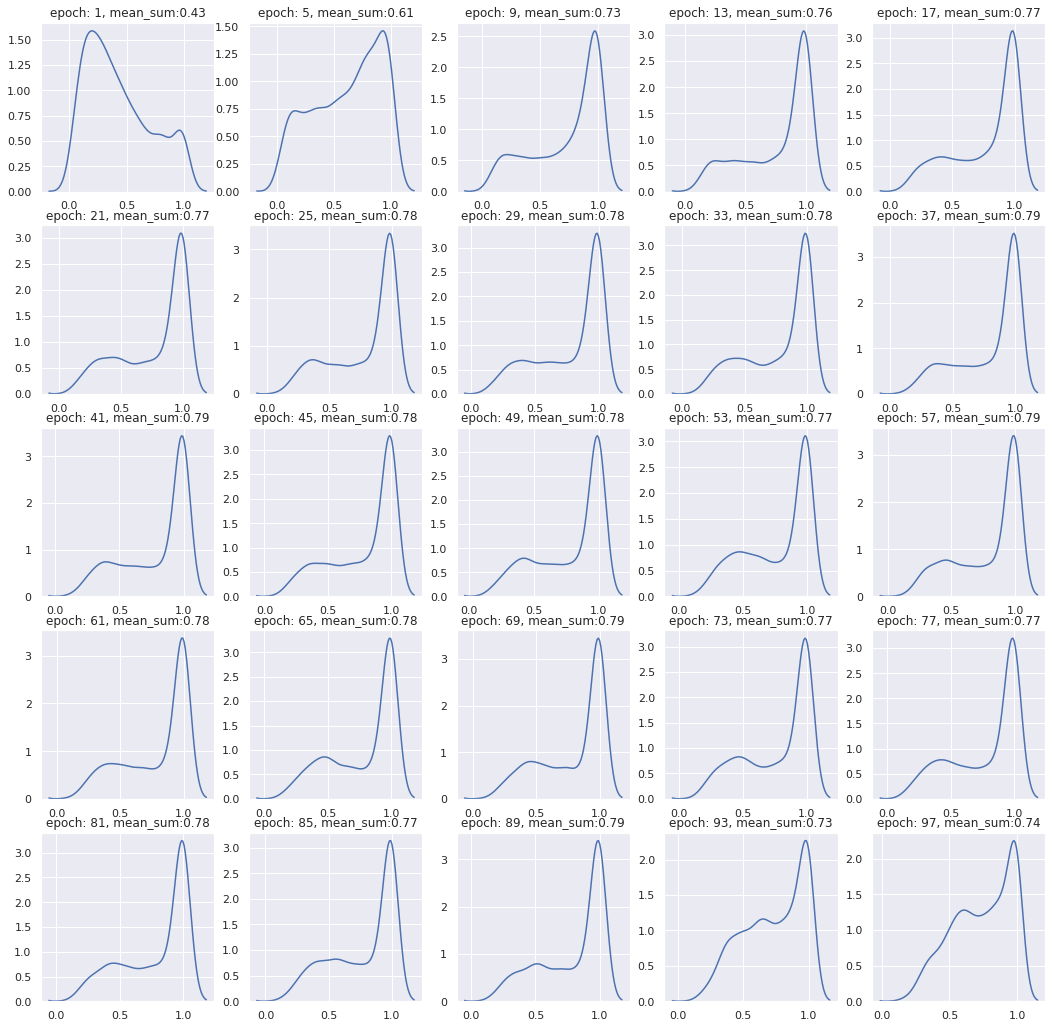

In [311]:
plt.rcParams['savefig.facecolor'] = "0.8"
plt.rcParams['figure.figsize'] = 18, 18.
fig, axs = plt.subplots(5, 5, constrained_layout=False)
# for ax in axs.flat:
axs = axs.flat
for _epoch in range(len(axs)):
#     plot_extropy_dist(axs[0,0], 0, 1)
    plot_top_sum(axs[_epoch], 1, _epoch*4+1, att_head=3)

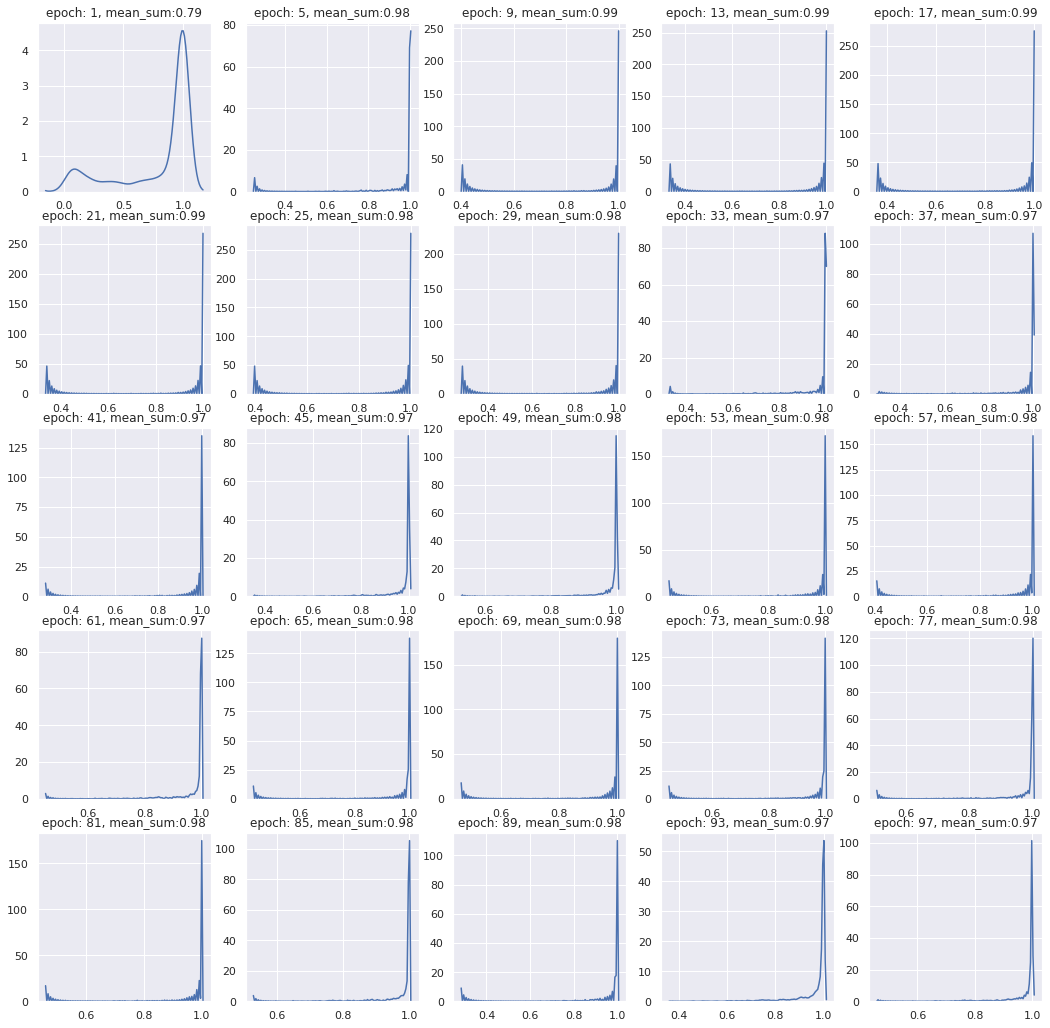

In [312]:
plt.rcParams['savefig.facecolor'] = "0.8"
plt.rcParams['figure.figsize'] = 18, 18.
fig, axs = plt.subplots(5, 5, constrained_layout=False)
# for ax in axs.flat:
axs = axs.flat
for _epoch in range(len(axs)):
#     plot_extropy_dist(axs[0,0], 0, 1)
    plot_top_sum(axs[_epoch], 2, _epoch*4+1, att_head=3)

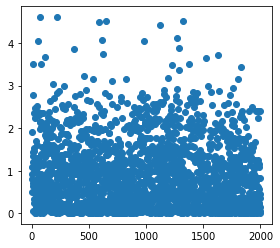

In [60]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import numpy as np


plt.rcParams['savefig.facecolor'] = "0.8"
plt.rcParams['figure.figsize'] = 4.5, 4.


def example_plot(ax, fontsize=12, nodec=False):
    ax.plot([2, 20])
    ax.locator_params(nbins=3)


fig, ax = plt.subplots(constrained_layout=False)
plot_extropy_dist(ax, fontsize=24)

In [296]:
conv_layer=0
epoch-30
top_sum = np.sum(np.array(top_probs[conv_layer][epoch]), 1)

In [298]:
top_sum.shape

(2000, 4)

In [356]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from pandas import Series, DataFrame

# # s = Series(np.random.randn(1000))
# # s.plot(kind='kde')
# # plt.show()

# import seaborn as sns; sns.set(color_codes=True)
# mean, cov = [0, 2], [(1, .5), (.5, 1)]
# x, y = np.random.multivariate_normal(mean, cov, size=50).T
# # print(x, y)
# ax = sns.kdeplot(top_sum[:,0])

In [303]:
top_sum[:, 0]

array([0.715 , 0.7154, 0.8879, ..., 0.6615, 0.8165, 0.868 ])

In [349]:
top_probs = np.load('pubmed_gat_sumtop2.npy', allow_pickle=True)

In [372]:
top_probs[1][150][50]

[[0.07227035611867905], [0.07202959805727005]]

In [ ]:
plt.rcParams['savefig.facecolor'] = "0.8"
plt.rcParams['figure.figsize'] = 18, 18.
fig, axs = plt.subplots(5, 5, constrained_layout=False)
# for ax in axs.flat:
axs = axs.flat
for _epoch in range(len(axs)):
#     plot_extropy_dist(axs[0,0], 0, 1)
    plot_top_sum(axs[_epoch], 1, _epoch*8+1, att_head=0)

In [319]:
top_sum = np.sum(np.array(top_probs[conv_layer][epoch]), 1)

In [328]:
top_sum = np.sum(np.array(top_probs[conv_layer][epoch]), 1)
# axis.set_title(f'epoch: {epoch}, mean_sum:{top_sum[:,att_head].mean():.2f}')
sns.kdeplot(top_sum[:,1])

IndexError: too many indices for array

In [383]:
import torch
neibs_class = torch.Tensor([3,3,4,5,3])
node_class = torch.tensor(3)
pos = torch.where(neibs_class==node_class)[0]
pos

tensor([0, 1, 4])

In [394]:
torch.tensor([_ for i in torch.tensor(range(5)) if i not in pos])

tensor([0, 0])

In [393]:
torch.tensor.range()

AttributeError: 'builtin_function_or_method' object has no attribute 'range'

In [395]:
[_ for i in torch.tensor(range(5)) if i not in pos]

[tensor([0, 0]), tensor([0, 0])]

In [411]:
torch.arange(10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [413]:
from scipy import sparse
edge_index = [[0,0,0,0,1,1,1,1,1],[0,2,3,4,5,6,7,8,9]]
sparse.coo_matrix((np.array(1), edge_index))

TypeError: len() of unsized object